# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, "html.parser")

In [5]:
# Extract all rows of data
weather = pd.read_html(url)[0]
print(weather)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create DataFrame of weather data
weather_df = pd.DataFrame(weather)

# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df.columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Confirm DataFrame was created successfully
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [8]:
# Change data types for data analysis
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"])

In [9]:
# Confirm type changes were successful by examining data types again
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
mars_months = weather_df.groupby(["month"]).count()["terrestrial_date"]
mars_months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64

In [11]:
# 2. How many Martian days' worth of data are there?
mars_days = weather_df["terrestrial_date"].count()
mars_days

1867

In [12]:
# 3. What is the average low temperature by month?
mars_mean_low_temp = weather_df.groupby(["month"]).mean()["min_temp"]
mars_mean_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

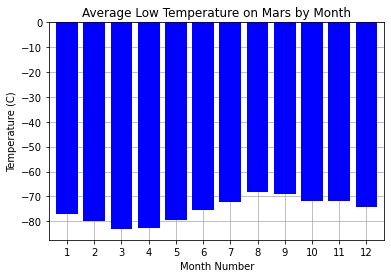

In [13]:
# Plot the average temperature by month
mars_mean_low_temp.plot.bar(color="b", align="center", width=0.8, zorder=2, rot=0)
plt.title("Average Low Temperature on Mars by Month")
plt.xlabel("Month Number")
plt.ylabel("Temperature (C)")
plt.grid(zorder=0)

The 3rd month has the lowest average temperature, while the 8th month has the highest average temperature.


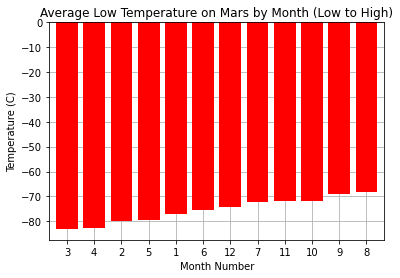

In [14]:
# Identify the coldest and hottest months in Curiosity's location
mars_mean_low_temp_low_to_high = mars_mean_low_temp.sort_values()
mars_mean_low_temp_low_to_high.plot.bar(color="r", align="center", width=0.8, zorder=2, rot=0)
plt.title("Average Low Temperature on Mars by Month (Low to High)")
plt.xlabel("Month Number")
plt.ylabel("Temperature (C)")
plt.grid(zorder=0)
print("The 3rd month has the lowest average temperature, while the 8th month has the highest average temperature.")

In [15]:
# 4. Average pressure by Martian month
mars_mean_pressure = weather_df.groupby(["month"]).mean()["pressure"]
mars_mean_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

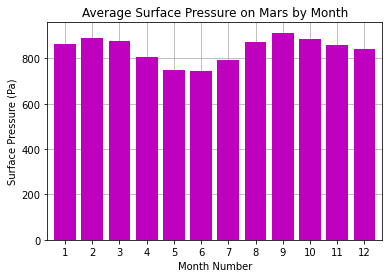

In [16]:
# Plot the average pressure by month
mars_mean_pressure.plot.bar(color="m", align="center", width=0.8, zorder=2, rot=0)
plt.title("Average Surface Pressure on Mars by Month")
plt.xlabel("Month Number")
plt.ylabel("Surface Pressure (Pa)")
plt.grid(zorder=0)

In [17]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Find and list days with starting solar longitude of 156 degrees (source: https://stackoverflow.com/questions/63518650/calculating-the-number-of-rows-between-occurrences-of-a-certain-value)
mars_weather_df = weather_df
weather_df['days_since'] = weather_df['ls'].eq(156).groupby(weather_df['terrestrial_date']).cumsum()
mask = ~weather_df.duplicated(['terrestrial_date', 'days_since']) & weather_df['days_since'].ne(0)
mars_ls156 = weather_df.loc[mask, ['terrestrial_date','ls']].copy()
mars_ls156['days_since'] = mars_ls156.groupby('terrestrial_date')['ls'].diff().fillna(0).astype(int)
print (mars_ls156)

     terrestrial_date   ls  days_since
1          2012-08-17  156           0
2          2012-08-18  156           0
600        2014-07-05  156           0
601        2014-07-06  156           0
1251       2016-05-22  156           0
1252       2016-05-23  156           0


In [18]:
# Calculation iteration 1: Count number of days between terrestrial dates on first day of ls=156.
start_date = date(2012, 8, 17)
end_date = date(2014, 7, 5)
delta = end_date - start_date
print(f"There are {delta.days} terrestrial days between the first day of ls=156 degrees in the first calculation.")

There are 687 terrestrial days between the first day of ls=156 degrees in the first calculation.


In [19]:
# Calculation iteration 2: Count number of days between terrestrial dates on first day of ls=156.
start_date1 = date(2014, 7, 5)
end_date1 = date(2016, 5, 22)
delta1 = end_date1 - start_date1
print(f"There are {delta1.days} terrestrial days between the first day of ls=156 degrees in the second calculation.")

There are 687 terrestrial days between the first day of ls=156 degrees in the second calculation.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The weather_df dataframe shows that the sun changes position by one longitudinal degree (ls) every two terrestrial days. Probe measurements commence on day two of ls=155 degrees, so calculations above commence on day one of ls=156 degrees.

Both sets of calculations of the number of days between the first day of ls=156 degrees and the first day of the next ls=156 degrees equal exactly 687 terrestrial days.

A search of NASA's Mars website (https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/) verifies that a Martian year is equivalent to 687 terrestrial days, confirming these calculations.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Delete extraneous column.
del weather_df["days_since"]
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [21]:
# Write the data to a CSV
weather_df.to_csv("output_data/mars_weather_data.csv", index_label="index")

In [22]:
browser.quit()